In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from utils import evaluate
from utils import get_score
from utils import get_evaluate

In [2]:
train = pd.read_csv('train_dataset.csv')

In [9]:
train.columns[442]

'resource_type 1'

In [4]:
train.head()

,id,location,fault_severity,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,event_type 15,...,feature 90 volume,feature 91 volume,feature 92 volume,feature 93 volume,feature 94 volume,feature 95 volume,feature 96 volume,feature 97 volume,feature 98 volume,feature 99 volume
0,14121,location 118,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9320,location 91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14394,location 152,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8218,location 931,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,14804,location 120,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
test = pd.read_csv('test_dataset.csv')

In [6]:
train.shape

(7381, 843)

In [7]:
test.shape

(11171, 842)

In [34]:
sample = pd.read_csv('sample_submission.csv')

In [9]:
sample.head()

,id,predict_0,predict_1,predict_2
0,11066,0,1,0
1,18000,0,1,0
2,16964,0,1,0
3,4795,0,1,0
4,3392,0,1,0


In [18]:
rfc = RandomForestClassifier()
insample_scores = []
outsample_scores = []
feature_ranges = [
    list(range(56, 843)),
    list(range(3, 56)) + list(range(442, 843)), 
    list(range(3, 442))+list(range(452, 843)),
    list(range(3, 452))+list(range(457, 843)),
    list(range(3, 457)),
    list(range(3, 843))]
for col_ids in feature_ranges:
    errors = get_score(
        train.iloc[:, col_ids].values,
        train.loc[:, 'fault_severity'].values,
        rfc)
    insample_scores.append(errors[0])
    outsample_scores.append(errors[1])

In [19]:
insample_scores

[0.91081900910010116,
 0.91061678463094031,
 0.91183013144590497,
 0.90353892821031345,
 0.79737108190090999,
 0.91304347826086951]

In [20]:
outsample_scores

[0.73399014778325122,
 0.74014778325123154,
 0.73686371100164205,
 0.73604269293924462,
 0.70443349753694584,
 0.73645320197044339]

In [3]:
rfc = RandomForestClassifier()
insample_evaluates = []
outsample_evaluates = []
feature_ranges = [
    list(range(56, 843)),
    list(range(3, 56)) + list(range(442, 843)), 
    list(range(3, 442))+list(range(452, 843)),
    list(range(3, 452))+list(range(457, 843)),
    list(range(3, 457)),
    list(range(3, 843))]
for col_ids in feature_ranges:
    evaluates = get_evaluate(
        train.iloc[:, col_ids].values,
        train.loc[:, 'fault_severity'].values,
        rfc)
    insample_evaluates.append(evaluates[0])
    outsample_evaluates.append(evaluates[1])

In [4]:
insample_evaluates

[0.23739996153013637,
 0.23722005848301028,
 0.23653200299480273,
 0.24677968395255326,
 0.45328504079323251,
 0.23521466489676976]

In [5]:
outsample_evaluates

[1.8004649521452973,
 1.6475682642747695,
 1.8206694831986241,
 1.9323544877298999,
 1.2848546197893473,
 1.8963774797012671]

In [10]:
param = {'n_estimators': list(range(30, 80))}

In [11]:
rfc = RandomForestClassifier(n_jobs=-1)

In [12]:
gs = GridSearchCV(rfc, param)

In [13]:
gs.fit(train.loc[:, 'event_type 1':], train.loc[:, 'fault_severity'])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [14]:
gs.best_params_

{'n_estimators': 46}

In [16]:
param = {'min_samples_split': list(range(2, 10))}

In [17]:
rfc = RandomForestClassifier(n_estimators=46, n_jobs=-1)

In [19]:
gs.fit(train.loc[:, 'event_type 1':], train.loc[:, 'fault_severity'])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=46, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [20]:
gs.best_params_

{'min_samples_split': 8}

In [21]:
gs.best_score_

0.74827259178973038

In [21]:
rfc = RandomForestClassifier(n_estimators=46, min_samples_split=8)
insample_scores = []
outsample_scores = []
feature_ranges = [
    list(range(56, 843)),
    list(range(3, 56)) + list(range(442, 843)), 
    list(range(3, 442))+list(range(452, 843)),
    list(range(3, 452))+list(range(457, 843)),
    list(range(3, 457)),
    list(range(3, 843))]
for col_ids in feature_ranges:
    errors = get_score(
        train.iloc[:, col_ids].values,
        train.loc[:, 'fault_severity'].values,
        rfc)
    insample_scores.append(errors[0])
    outsample_scores.append(errors[1])

In [22]:
insample_scores

[0.86956521739130432,
 0.87583417593528812,
 0.86774519716885745,
 0.85965621840242668,
 0.78806875631951467,
 0.86552072800808899]

In [23]:
outsample_scores

[0.7405582922824302,
 0.75123152709359609,
 0.7479474548440066,
 0.75,
 0.70648604269293924,
 0.75164203612479474]

In [28]:
rfc = RandomForestClassifier(n_estimators=46, min_samples_split=8)
insample_evaluates = []
outsample_evaluates = []
feature_ranges = [
    list(range(3, 843)),
    list(range(56, 843)),
    list(range(3, 56)) + list(range(442, 843)), 
    list(range(3, 442))+list(range(452, 843)),
    list(range(3, 452))+list(range(457, 843)),
    list(range(3, 457)),
    list(range(3, 56)) + list(range(452, 843)),
    list(range(452, 843))]
for col_ids in feature_ranges:
    evaluates = get_evaluate(
        train.iloc[:, col_ids].values,
        train.loc[:, 'fault_severity'].values,
        rfc)
    insample_evaluates.append(evaluates[0])
    outsample_evaluates.append(evaluates[1])

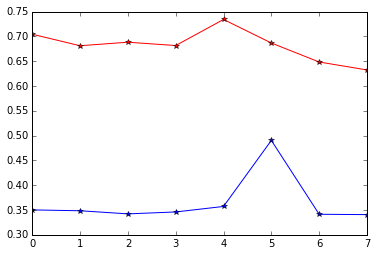

In [23]:
plt.figure()
plt.plot(insample_evaluates, marker='*')
plt.plot(outsample_evaluates, color='r', marker='*')

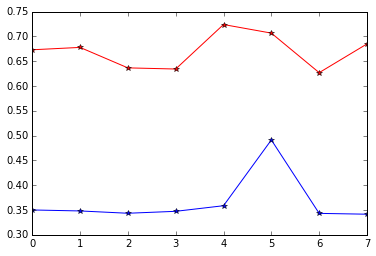

In [25]:
plt.figure()
plt.plot(insample_evaluates, marker='*')
plt.plot(outsample_evaluates, color='r', marker='*')

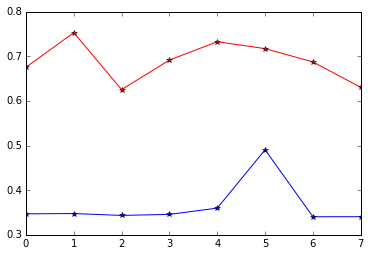

In [27]:
plt.figure()
plt.plot(insample_evaluates, marker='*')
plt.plot(outsample_evaluates, color='r', marker='*')

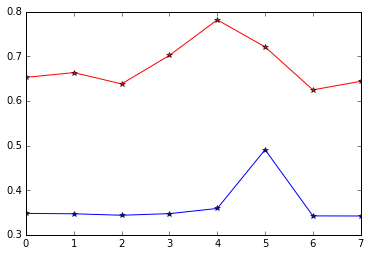

In [29]:
plt.figure()
plt.plot(insample_evaluates, marker='*')
plt.plot(outsample_evaluates, color='r', marker='*')

In [30]:
rfc = RandomForestClassifier(n_estimators=46, min_samples_split=8)

In [31]:
rfc.fit(train.iloc[:, list(range(3, 56)) + list(range(452, 843))], train.loc[:, 'fault_severity'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=46, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
result = rfc.predict(test.iloc[:, list(range(2, 55)) + list(range(451, 842))])

In [37]:
result.shape

(11171,)

In [38]:
rfc.classes_

array([0, 1, 2])

In [39]:
prob = rfc.predict_proba(test.iloc[:, list(range(2, 55)) + list(range(451, 842))])

In [30]:
prob.shape

(11171, 3)

In [40]:
rfc_res = pd.DataFrame({
    'id': sample.loc[:, 'id'].values, 
    'predict_0': prob[:, 0],
    'predict_1': prob[:, 1],
    'predict_2': prob[:, 2]})

In [41]:
rfc_res.head()

,id,predict_0,predict_1,predict_2
0,11066,0.985507,0.014493,0.000000
1,18000,0.150466,0.011620,0.837914
2,16964,1.000000,0.000000,0.000000
3,4795,0.598255,0.382179,0.019565
4,3392,0.233633,0.766367,0.000000


In [42]:
rfc_res.to_csv('randomforest.csv', index=False)